<a href="https://colab.research.google.com/github/kalusam1/digit-classification/blob/main/digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as pimg 
import tensorflow as tf
import pandas as pd
import numpy as np
import random 
import os
from tensorflow import keras

In [7]:
digits_mnist = keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels) = digits_mnist.load_data()

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
import sys
np.set_printoptions(threshold=sys.maxsize)
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [11]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

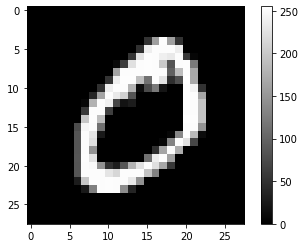

In [12]:
plt.figure()
plt.imshow(train_images[1],cmap = 'gray')
plt.colorbar()
plt.grid(False)
plt.show()

# PREPROCESSING
_Here we will carry out normalization i.e converting the image pixels to values between 0 and 1_

In [13]:
train_images = train_images/ 255.0
test_images = test_images/ 255.0

In [14]:
#ADDING A CONVOLUTIONAL LAYER OR EVEN 2
model = keras.Sequential([
   # conv layer 1
    keras.layers.Conv2D(16,(3,3), input_shape=(28,28,1), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    # conv layer 2 
    keras.layers.Conv2D(16,(3,3), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    # normal layers
    keras.layers.Flatten(), # input layer
    keras.layers.Dense(128,activation='relu'), # hidden layer
    keras.layers.Dense(10,activation='softmax'), # output layer
])


In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [24]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0088 - accuracy: 0.9971
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0077 - accuracy: 0.9974
Epoch 3/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0075 - accuracy: 0.9976
Epoch 4/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0058 - accuracy: 0.9977
Epoch 5/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0070 - accuracy: 0.9977


In [25]:
print('MODEL EVALUATION ON TEST DATA')
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)


MODEL EVALUATION ON TEST DATA
313/313 [==============================] - 2s 6ms/step - loss: 0.0369 - accuracy: 0.9911


lets have some fun trying to predict the first five test images

In [26]:
model.save('first_convnet_model_with_mnist_digit.h5')

In [27]:
predictions = model.predict(test_images[:5])
print(predictions)

[[7.01165615e-16 5.84198922e-12 5.46809980e-14 3.53918792e-14
  9.50410524e-08 5.50000463e-17 1.56328076e-19 9.99999881e-01
  1.77871715e-13 2.91986249e-12]
 [1.06506556e-18 1.00830506e-14 1.00000000e+00 2.97032965e-22
  1.68505455e-21 2.85238360e-26 4.13222112e-16 3.29060137e-23
  6.46167769e-18 1.40683943e-32]
 [1.22177468e-08 9.99996901e-01 1.13060949e-09 1.05000508e-14
  1.96573592e-06 1.14135082e-11 1.25730801e-10 9.81923108e-07
  1.31126114e-07 1.15048474e-11]
 [1.00000000e+00 5.08632644e-16 4.53851519e-15 2.25014175e-15
  1.03234473e-17 4.37364598e-12 3.52817295e-08 5.68165825e-16
  2.74897089e-15 8.22646953e-15]
 [4.98400837e-17 9.02595395e-14 1.39119878e-15 1.20336974e-18
  1.00000000e+00 2.20753433e-18 1.95906290e-15 2.76059208e-16
  1.47601036e-16 2.30980195e-08]]


In [28]:
print(np.argmax(predictions[0]))

7


In [29]:
print(predictions[0])

[7.0116562e-16 5.8419892e-12 5.4680998e-14 3.5391879e-14 9.5041052e-08
 5.5000046e-17 1.5632808e-19 9.9999988e-01 1.7787171e-13 2.9198625e-12]


In [30]:
print(test_labels[0])

7


**SO THE MODEL KIND OF PREDICTS OUTPUT USING A PROBABILITY SCORE AND THE CLASS WITH THE CLOSEST SCORE TO 1 , GETS CHOSEN AS THE PREDICTED CLASS**

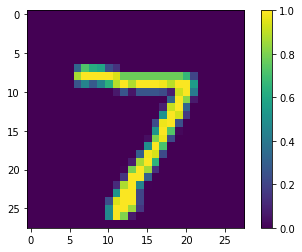

In [31]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

😁😁😀😀
DEEP LEARNING == FUN == True